## SED fitting using a functional form SFH;

This notebook will demosntrate how we get SED results with broadband data points using a function form for SFHs.


In [1]:
%matplotlib inline
%load_ext autoreload

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt

from astropy.io import ascii,fits
from astropy.convolution import Gaussian2DKernel
from astropy.stats import gaussian_fwhm_to_sigma
from astropy.table import QTable
import astropy.units as u

from astropy import __version__ as asver
asver

'4.0.1.post1'

In [3]:
# https://github.com/mtakahiro/gsf/tree/version1.4
import gsf
print(gsf.__version__)

from gsf.function import get_input
from gsf.gsf import run_gsf_template
from gsf.plot_sed_logA import plot_sed_tau, plot_corner_physparam_frame, plot_corner_physparam_summary
from gsf.plot_sfh_logA import plot_sfh_tau

1.4


### Setup gsf

In [4]:
# Initial setup for gsf.

# Data directory;
DIR_DATA = './data/'


# Auto load input dictionary;
inputs = get_input()

# change Z;
# Flag;
fplt = 0
inputs['DIR_TEMP'] = './templates_del/'

# Output directory;
inputs['DIR_OUT'] = './output_del/'

# If templates exit already, then let's save time.
# (But if you changed metallicity range or age pixels, fplt needs to be 0.)
if os.path.exists('%s/spec_all.asdf'%inputs['DIR_TEMP']):
    fplt = 1

inputs['ID'] = '32707'

# Redshift will be obtained from BB catalog;
inputs['ZGAL'] = 1.647

# Redshift as a free parameter?
inputs['ZMC'] = 0

# Metallicity range, in logZsun;
inputs['ZMIN'] = -0.4
inputs['ZMAX'] = 0.41
inputs['DELZ'] = 0.2
# You can fix metallicity;
#inputs['ZFIX'] = 0.0

# Tau model specific;
inputs['SFH_FORM'] = 4 # delayed tau.
inputs['NPEAK'] = 2 # Number of SFH components.
inputs['AGEMIN'] = -1
inputs['AGEMAX'] = 1.2
inputs['DELAGE'] = 0.1
inputs['TAUMIN'] = -1.
inputs['TAUMAX'] = 1.0
inputs['DELTAU'] = 0.1
inputs['NIMF'] = 1

# Templates;
# Currently in prep.
inputs['BPASS'] = 0

# Data;
inputs['DIR_FILT'] = './filter/'
inputs['CAT_BB'] = DIR_DATA + 'uds_PHOT_xy.cat'

# Filters;
# Each number corresponds to EAZY's filter ids. See also filter/filt_Sep20.lst
# These numbers need to be found in inputs['CAT_BB'] file.
inputs['FILTER'] = '205,88,122,79,236,123,124,239,125,203,263,204,264,265,18,19,20,21'

# MCMC part;
inputs['NMC'] = 10000 # NMC for the main SED fit
inputs['NMCZ'] = 30 # NMC for the redshift fit

# Visual inspection;
# Set to 0 (False), as Notebook cannot show actively iterating plot;
inputs['ZVIS'] = 0

# Initial fit:
inputs['FNELD'] = 0


In [5]:
fplt
inputs

{'ID': '32707',
 'PA': '00',
 'ZGAL': 1.647,
 'CZ0': 1.0,
 'CZ1': 1.0,
 'BPASS': 0,
 'DIR_TEMP': './templates_del/',
 'DIR_FILT': '/astro/udfcen3/Takahiro/Borg/SPITZ_for_ALMA/HST_cycle25_bg/borgpipe/eazy/filter/',
 'AGE': '0.01,0.03,0.1,0.3,1.0,3.0',
 'NIMF': 1,
 'NMC': 10000,
 'NWALK': 50,
 'NMCZ': 30,
 'NWALKZ': 20,
 'ZEVOL': 0,
 'ZVIS': 0,
 'FNELD': 0,
 'DIR_OUT': './output_del/',
 'ZMC': 0,
 'ZMIN': -0.4,
 'ZMAX': 0.41,
 'DELZ': 0.2,
 'SFH_FORM': 4,
 'NPEAK': 2,
 'AGEMIN': -1,
 'AGEMAX': 1.2,
 'DELAGE': 0.1,
 'TAUMIN': -1.0,
 'TAUMAX': 1.0,
 'DELTAU': 0.1,
 'CAT_BB': './uds_PHOT_xy.cat',
 'FILTER': '205,88,122,79,236,123,124,239,125,203,263,204,264,265,18,19,20,21'}

In [6]:
# Then, run template generate function;
mb = run_gsf_template(inputs, fplt=fplt)
fplt = 1



Fitting : 32707

f_Mdyn is set to False

Age max is set to the age of the univese (4.0) at this redshift.

##########################
Metallicity evolution is off.

##########################
No. of params are : 8
Dust attenuation is set to Calz





KeyboardInterrupt: 

In [7]:
# You can write down the input file in an ascii file.
from gsf.function import write_input
write_input(inputs, file_out='gsf_del.input')


True

### Now, run the whole SED fitting;


Fitting : 32707

f_Mdyn is set to False

Age max is set to the age of the univese (4.0) at this redshift.

##########################
Metallicity evolution is off.

##########################
No. of params are : 8
Dust attenuation is set to Calz



########################
### Fitting Function ###
########################
READ data with Cz0=1.00, Cz0=1.00, zgal=1.65
Dust is set in [0.0:4.0]/mag. Initial value is set to 0.5


  0%|          | 0/10000 [00:00<?, ?it/s]/Users/tmorishita/anaconda3/envs/gsf/lib/python3.7/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
  0%|          | 10/10000 [00:00<01:40, 99.09it/s]




#####################################
Zbest, chi are; 0 55.9755501
Params are; [[Fit Statistics]]
    # fitting method   = Powell
    # function evals   = 15740
    # data points      = 18
    # variables        = 8
    chi-square         = 559.755501
    reduced chi-square = 55.9755501
    Akaike info crit   = 77.8683099
    Bayesian info crit = 84.9912839
##  Warning: uncertainties could not be estimated:
    this fitting method does not natively calculate uncertainties
    and numdifftools is not installed for lmfit to do this. Use
    `pip install numdifftools` for lmfit to estimate uncertainties
    with this fitting method.
[[Variables]]
    A0:    1.45991988 (init = -1)
    TAU0: -0.99739235 (init = 0)
    AGE0: -2.7793e-05 (init = -0.1995848)
    Z0:    0.37816364 (init = 0.2)
    A1:    1.08986553 (init = -1)
    TAU1: -0.56562288 (init = -0.5228787)
    AGE1:  0.38167500 (init = 0)
    Av:    0.57575862 (init = 0.5)
#####################################



z-distribution f

 10%|▉         | 999/10000 [00:09<01:21, 110.50it/s]/Users/tmorishita/anaconda3/envs/gsf/lib/python3.7/site-packages/emcee/autocorr.py:36: RuntimeWarning: invalid value encountered in true_divide
  acf /= acf[0]
/Users/tmorishita/anaconda3/envs/gsf/lib/python3.7/site-packages/emcee/autocorr.py:41: RuntimeWarning: invalid value encountered in less
  m = np.arange(len(taus)) < c * taus
/Users/tmorishita/anaconda3/envs/gsf/lib/python3.7/site-packages/emcee/autocorr.py:99: RuntimeWarning: invalid value encountered in greater
  flag = tol * tau_est > n_t
/Users/tmorishita/anaconda3/envs/gsf/lib/python3.7/site-packages/gsf-1.4-py3.7.egg/gsf/minimizer.py:1362: RuntimeWarning: invalid value encountered in less
  converged = np.all(tau * 100 < self.sampler.iteration)
/Users/tmorishita/anaconda3/envs/gsf/lib/python3.7/site-packages/gsf-1.4-py3.7.egg/gsf/minimizer.py:1363: RuntimeWarning: invalid value encountered in less
  converged &= np.all(np.abs(old_tau - tau) / tau < 0.01)
100%|██████████| 

The chain is shorter than 50 times the integrated autocorrelation time for 3 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 200;
tau: [         nan          nan          nan 699.26231962          nan
 825.47325592 721.57885866          nan]
###############################
### MCMC part took 95.8 sec ###
###############################
 => Saving data to cpklfile ./output_del/chain_32707_corner.cpkl
##########################
### Writing parameters ###
##########################


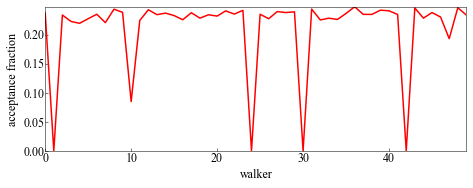

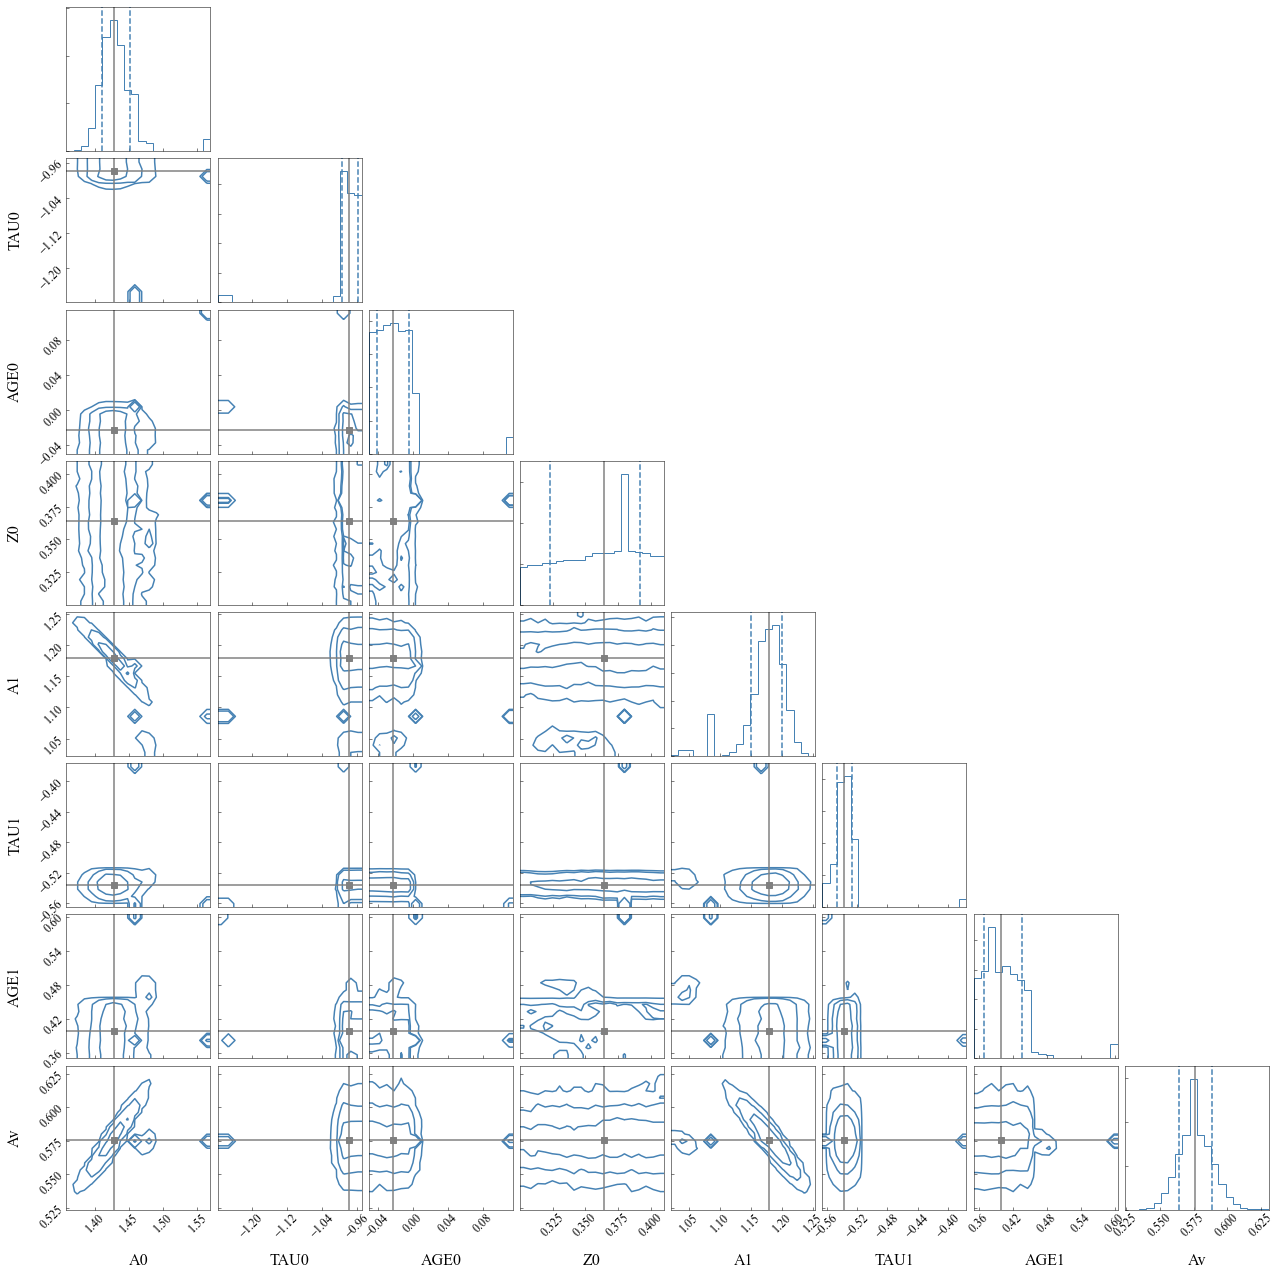

In [9]:
mb = run_gsf_template(inputs, fplt=10)


# If updated any parameter in inputs, run this; 
if False:
    mb.update_input(inputs)

# Since already z-fit done, we can skip z-fit;
skip_fitz = True

# Main;
flag_suc = mb.main(cornerplot=True, specplot=1, sigz=1.0, ezmin=0.01, ferr=0, 
                   f_move=False, skip_fitz=skip_fitz, f_shuffle=True)

# If the call above fail, try again with f_shuffle=False.


Rejuvenation judge failed. (plot_sfh.py)


<Figure size 576x201.6 with 0 Axes>

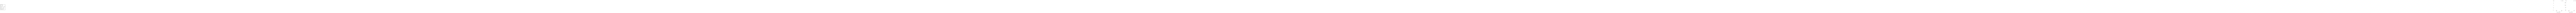

In [10]:
# Plot SFH;

# Plot Starforming Main Sequence from Speagle+14?
f_SFMS = True
f_symbol = True
skip_zhist = True
tau_lim = 0.01
tset_SFR_SED = 10
mmax = 300

plot_sfh_tau(mb, f_comp=mb.ftaucomp, fil_path=mb.DIR_FILT, mmax=mmax,
inputs=mb.inputs, dust_model=mb.dust_model, DIR_TMP=mb.DIR_TMP, f_silence=True, 
f_SFMS=f_SFMS, f_symbol=f_symbol, skip_zhist=skip_zhist, tau_lim=tau_lim, tset_SFR_SED=tset_SFR_SED)


READ data with Cz0=1.00, Cz0=1.00, zgal=1.65


/Users/tmorishita/anaconda3/envs/gsf/lib/python3.7/site-packages/gsf-1.4-py3.7.egg/gsf/plot_sed_logA.py:1728: RuntimeWarning: invalid value encountered in true_divide
  AM50 = A50 * M50 * ms / MSsum
/Users/tmorishita/anaconda3/envs/gsf/lib/python3.7/site-packages/gsf-1.4-py3.7.egg/gsf/plot_sed_logA.py:1731: RuntimeWarning: invalid value encountered in true_divide
  AM50 = A50 * M50 * ms / MSsum * CM
/Users/tmorishita/anaconda3/envs/gsf/lib/python3.7/site-packages/gsf-1.4-py3.7.egg/gsf/plot_sed_logA.py:1732: RuntimeWarning: invalid value encountered in true_divide
  AM16 = A16 * M50 * ms / MSsum * CM
/Users/tmorishita/anaconda3/envs/gsf/lib/python3.7/site-packages/gsf-1.4-py3.7.egg/gsf/plot_sed_logA.py:1733: RuntimeWarning: invalid value encountered in true_divide
  AM84 = A84 * M50 * ms / MSsum * CM


Progress: |███████████████████████████████████████-| 99.7% Complete (299/300)


No-of-detection    : 15
chi2               : 45.83
No-of-non-detection: 0
chi2 for non-det   : -0.00
No-of-params       : 8
Degrees-of-freedom : 7
Final chi2/nu      : 6.55


/Users/tmorishita/anaconda3/envs/gsf/lib/python3.7/site-packages/gsf-1.4-py3.7.egg/gsf/plot_sed_logA.py:2158: RuntimeWarning: divide by zero encountered in log10
  MUV = -2.5 * np.log10(Fuv[:]) + 25.0


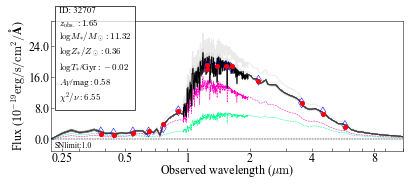

In [11]:
# Plot SED;
plot_sed_tau(mb, fil_path=mb.DIR_FILT,
figpdf=False, save_sed=True, inputs=mb.inputs, mmax=300,
f_fill=True, dust_model=mb.dust_model, DIR_TMP=mb.DIR_TMP, f_label=True)
